# Brute Force Detection with ORB

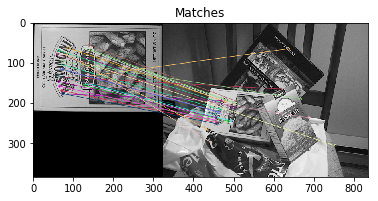

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img1 = cv2.imread('../Data/Images/box.png',0)          # queryImage
img2 = cv2.imread('../Data/Images/box_in_scene.png',0) # trainImage

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:30], flags=2, outImg=img1)

cv2.imshow('Matches', img3)
cv2.waitKey()

plt.imshow(img3)
plt.title('Matches')
plt.show()

cv2.destroyAllWindows()

# Brute-Force Matching with SIFT Descriptors and Ratio Test

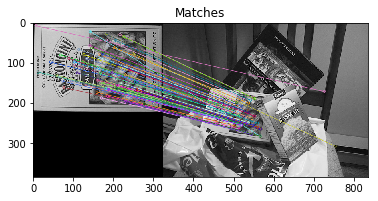

In [30]:
sift = cv2.xfeatures2d.SIFT_create()

img1 = cv2.imread('../Data/Images/box.png',0)          # queryImage
img2 = cv2.imread('../Data/Images/box_in_scene.png',0) # trainImage

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1,des2, k=2)

good = []
for match1,match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        

sift_matches = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

cv2.imshow('Matches', sift_matches)
cv2.waitKey()

plt.imshow(sift_matches)
plt.title('Matches')
plt.show()

cv2.destroyAllWindows()

# FLANN based Matcher

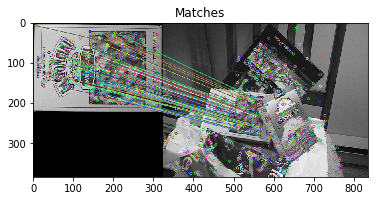

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

img1 = cv2.imread('../Data/Images/box.png',0)          # queryImage
img2 = cv2.imread('../Data/Images/box_in_scene.png',0) # trainImage

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=0)

cv2.imshow('Matches', flann_matches)
cv2.waitKey()

plt.imshow(flann_matches)
plt.title('Matches')
plt.show()

cv2.destroyAllWindows()

# Resources

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html#matcher